In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import datetime

import pylab  as pl 
import pandas as pd
import numpy  as np

In [2]:
index = pd.read_json("https://archive.analytics.mybinder.org/index.jsonl",
                     lines=True)

In [3]:
# get all days since start of June 2020.
now = datetime.datetime.now()
n   = (now - datetime.datetime(2020, 7, 1)).days

frames = []

count  = 0

for idx, day in index.sort_index(ascending=False).iterrows():
    df = pd.read_json("https://archive.analytics.mybinder.org/{}".format(day['name']), lines=True)
    frames.append(df)

    if len(frames) > n:
        break

    print(count, n)
    
    count += 1
        
print(f"Fetched data for {n} days.")

0 165
1 165
2 165
3 165
4 165
5 165
6 165
7 165
8 165
9 165
10 165
11 165
12 165
13 165
14 165
15 165
16 165
17 165
18 165
19 165
20 165
21 165
22 165
23 165
24 165
25 165
26 165
27 165
28 165
29 165
30 165
31 165
32 165
33 165
34 165
35 165
36 165
37 165
38 165
39 165
40 165
41 165
42 165
43 165
44 165
45 165
46 165
47 165
48 165
49 165
50 165
51 165
52 165
53 165
54 165
55 165
56 165
57 165
58 165
59 165
60 165
61 165
62 165
63 165
64 165
65 165
66 165
67 165
68 165
69 165
70 165
71 165
72 165
73 165
74 165
75 165
76 165
77 165
78 165
79 165
80 165
81 165
82 165
83 165
84 165
85 165
86 165
87 165
88 165
89 165
90 165
91 165
92 165
93 165
94 165
95 165
96 165
97 165
98 165
99 165
100 165
101 165
102 165
103 165
104 165
105 165
106 165
107 165
108 165
109 165
110 165
111 165
112 165
113 165
114 165
115 165
116 165
117 165
118 165
119 165
120 165
121 165
122 165
123 165
124 165
125 165
126 165
127 165
128 165
129 165
130 165
131 165
132 165
133 165
134 165
135 165
136 165
137 165
138 16

In [4]:
df = pd.concat(frames)

In [5]:
# make it easier to grab the ref
def get_repo(spec):
    s = spec.rsplit("/", 1)[0]
    if s.endswith('.git'):
        s = s[:-4]
    return s

df['repo'] = df['spec'].apply(get_repo) #lambda s: s.rsplit("/", 1)[0].replace(".git", ""))
df['org'] = df['spec'].apply(lambda s: s.split("/", 1)[0])

In [6]:
# take a look at the data, does it look sensible?
df.sample(10)

,timestamp,schema,version,provider,spec,ref,status,origin,repo,org
2069,2020-07-19 05:08:00+00:00,binderhub.jupyter.org/launch,4,GitHub,OTRF/infosec-jupyterthon/master,4695dffa8ee319e2b6eb2c1e8d6f2b21cd7168e5,success,gesis.mybinder.org,OTRF/infosec-jupyterthon,OTRF
24796,2020-11-10 19:49:00+00:00,binderhub.jupyter.org/launch,4,GitHub,lewagon/python-scraping-workshop/master,ee8027d4b2cf501f4ac6aa2aae947a74ca5f9e4d,success,gesis.mybinder.org,lewagon/python-scraping-workshop,lewagon
12121,2020-11-16 12:20:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jupyterlab/jupyterlab-demo/master,79184a07d47cf03787b39cfc345da98794d76554,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
13651,2020-07-06 15:29:00+00:00,binderhub.jupyter.org/launch,4,GitHub,sdc50/covid-19-dashboard/master,b333c0e0838d0d360edb2b05ac26db773137d7d5,success,gke.mybinder.org,sdc50/covid-19-dashboard,sdc50
1754,2020-07-28 03:16:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gke.mybinder.org,ipython/ipython-in-depth,ipython
24149,2020-09-25 23:06:00+00:00,binderhub.jupyter.org/launch,4,GitHub,cmarshak/sari-tutorial/master,1304ba006755dd42cec42b2c49281c386b877c61,success,gesis.mybinder.org,cmarshak/sari-tutorial,cmarshak
9110,2020-07-14 11:21:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gke.mybinder.org,ipython/ipython-in-depth,ipython
17388,2020-10-16 16:13:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
20098,2020-09-24 17:00:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gke2.mybinder.org,ipython/ipython-in-depth,ipython
17206,2020-09-14 16:06:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython


In [7]:
df = df.drop(columns=['schema', 'version', 'spec', 'ref'])

In [8]:
df.sample(10)

,timestamp,provider,status,origin,repo,org
5205,2020-07-30 06:55:00+00:00,GitHub,success,gke.mybinder.org,HiSPARC/infopakket,HiSPARC
13766,2020-11-01 18:26:00+00:00,GitHub,success,gke.mybinder.org,binder-examples/r,binder-examples
6638,2020-10-24 11:09:00+00:00,GitHub,success,ovh.mybinder.org,qiskit-community/qiskit-textbook,qiskit-community
8594,2020-11-01 13:22:00+00:00,GitHub,success,turing.mybinder.org,ipython/ipython-in-depth,ipython
17545,2020-12-09 15:42:00+00:00,GitHub,success,gke.mybinder.org,bokeh/bokeh-notebooks,bokeh
3804,2020-08-19 05:32:00+00:00,Gist,success,gke.mybinder.org,ArthurAraujoBrum/db9a12ff5de8ded6af4845db0fc272e4,ArthurAraujoBrum
1819,2020-07-17 03:26:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
17239,2020-08-21 19:07:00+00:00,GitHub,success,ovh.mybinder.org,UChicagoPhysicsLabs/nbinteract-tutorial,UChicagoPhysicsLabs
15178,2020-11-19 13:29:00+00:00,GitHub,success,turing.mybinder.org,kaust-vislab/introduction-to-data-science-work...,kaust-vislab
11263,2020-11-23 10:48:00+00:00,GitHub,success,gke.mybinder.org,ipython/ipython-in-depth,ipython


In [9]:
np.any(df['repo'] == 'michaelJwilson/DESI-HighSchool')

True

In [10]:
ds = df[df['repo'] == 'michaelJwilson/DESI-HighSchool']

In [11]:
ds['pd_timestamp'] = pd.to_datetime(ds.timestamp)

/Users/MJWilson/opt/miniconda3/envs/desihigh/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
ds.sort_values(by='pd_timestamp')

,timestamp,provider,status,origin,repo,org,pd_timestamp
2953,2020-07-09 04:59:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 04:59:00+00:00
2980,2020-07-09 05:03:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:03:00+00:00
3015,2020-07-09 05:04:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:04:00+00:00
3108,2020-07-09 05:12:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:12:00+00:00
3107,2020-07-09 05:12:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:12:00+00:00
...,...,...,...,...,...,...,...
25237,2020-12-03 23:18:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-12-03 23:18:00+00:00
3045,2020-12-04 03:51:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-12-04 03:51:00+00:00
19146,2020-12-05 23:52:00+00:00,GitHub,success,gesis.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-12-05 23:52:00+00:00
12805,2020-12-06 17:31:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-12-06 17:31:00+00:00


In [13]:
daily = ds.set_index("timestamp").resample('D').count()

In [14]:
daily.head()

,provider,status,origin,repo,org,pd_timestamp
timestamp,,,,,,
2020-07-09 00:00:00+00:00,9,9,9,9,9,9
2020-07-10 00:00:00+00:00,0,0,0,0,0,0
2020-07-11 00:00:00+00:00,3,3,3,3,3,3
2020-07-12 00:00:00+00:00,0,0,0,0,0,0
2020-07-13 00:00:00+00:00,11,11,11,11,11,11


In [15]:
daily.tail()

,provider,status,origin,repo,org,pd_timestamp
timestamp,,,,,,
2020-12-04 00:00:00+00:00,1,1,1,1,1,1
2020-12-05 00:00:00+00:00,1,1,1,1,1,1
2020-12-06 00:00:00+00:00,1,1,1,1,1,1
2020-12-07 00:00:00+00:00,0,0,0,0,0,0
2020-12-08 00:00:00+00:00,1,1,1,1,1,1


Text(0.5, 0, '')

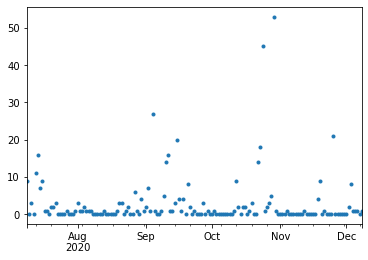

In [16]:
daily['repo'].plot(marker='.', lw=0.)

ax = pl.gca()

ax.set_xlabel('')

In [17]:
np.sum(daily['repo'])

237